# Yapay Nöronlar ve Tek Katmanlı Sinir Ağı

<br>
<br>

**Bu ders, makine öğreniminin tarihine ve temel kavramlarına kısa bir bakış sunmaktadır. Algoritmik olarak tanımlanan ilk sinir ağına ve uyarlamalı lineer nöronlar bağlamında gradyan iniş algoritmasına bir göz atacağız; bu, yalnızca makine öğrenimi ilkelerini tanıtmakla kalmayacak, aynı zamanda gelecekteki makalelerde modern çok katmanlı sinir ağlarının temeli olarak hizmet edecektir.**

# Giriş

Bu derste, tek katmanlı sinir ağları kategorisine giren algılayıcıları ve adaline'yi (ADAptive LINEar NEuron) tanıtacaktır. Perceptron, yalnızca algoritmik olarak tanımlanan ilk öğrenme algoritması [1] değil, aynı zamanda çok sezgisel, uygulaması kolay ve (yeniden keşfedilen) modern son teknoloji makine öğrenimi algoritmalarına iyi bir giriş noktasıdır: Yapay sinir ağları (veya isterseniz "derin öğrenme"). Daha sonra göreceğimiz gibi, adaline, perceptron algoritmasının bir sonucu olarak geliştirilmiş ve makine öğreniminde popüler bir optimizasyon algoritması hakkında bilgi edinmek için iyi bir fırsat sunuyor: gradyan iniş.

<br>
<br>

# Yapay Nöronlar ve McCulloch-Pitts Modeli

Algılayıcının ilk fikri, biyolojik nöronlar ile ikili çıkışlı basit mantık kapıları arasında bir analoji çizen Warren McCulloch ve Walter Pitts'in 1943'teki [[2](#References)] çalışmasına dayanır. Daha sezgisel terimlerle, nöronlar biyolojik bir beyindeki bir sinir ağının alt birimleri olarak anlaşılabilir. Burada, değişken büyüklükteki sinyaller dendritlere ulaşır. Bu giriş sinyalleri daha sonra nöronun hücre gövdesinde biriktirilir ve eğer biriken sinyal belirli bir eşiği aşarsa, akson tarafından iletilecek olan bir çıkış sinyali üretilir.


<img src='./images/perceptron_neuron.png' alt=''>

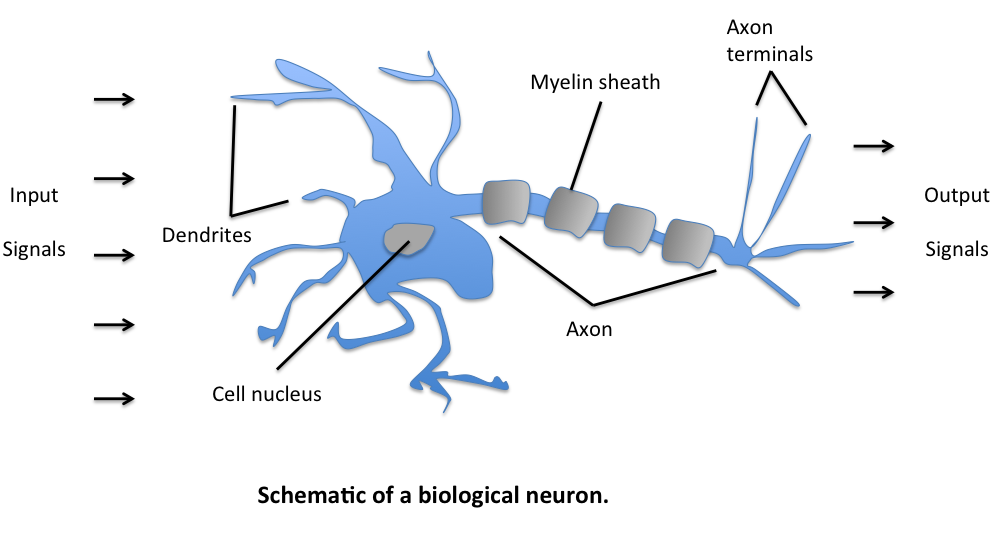<br>
<br>

# Frank Rosenblatt'ın Algılayıcı Öğrenme Algoritması

McCulloch ve Walter Pitt'ten birkaç yıl sonra Frank Rosenblatt, Perceptron öğrenme kuralının ilk kavramını [[1](#References)] yayınladı. Ana fikir, bir nöronun ateşlenip ateşlenmediğine karar vermek için daha sonra girdi özellikleriyle çarpılan $w$ ağırlıklarının değerlerini öğrenmek için bir algoritma tanımlamaktı. Örüntü sınıflandırması bağlamında, böyle bir algoritma, bir örneğin bir sınıfa mı yoksa diğerine mi ait olduğunu belirlemek için yararlı olabilir. 



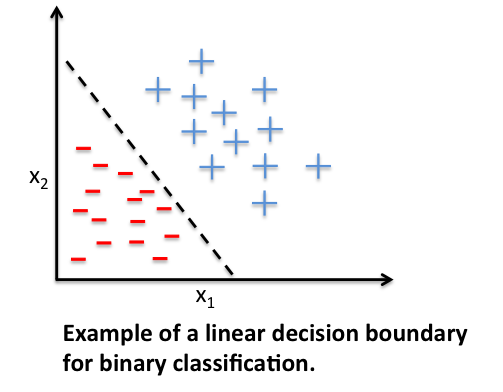<img src='./images/perceptron_binary.png' alt=''>

Algılayıcı, denetimli öğrenme algoritmaları kategorisine, daha spesifik olması için tek katmanlı ikili doğrusal sınıflandırıcılara aittir. Kısaca, görev, bir dizi girdi değişkenine dayanarak belirli bir veri noktasının iki olası kategoriden hangisine ait olduğunu tahmin etmektir.

<br>
<br>

## The Birim Basamak Fonksiyonu

Yapay nöronun ağırlıklarını öğrenmek için algoritma(lar)da daha derine dalmadan önce, temel gösterime kısaca bir göz atalım. Sonraki bölümlerde, ikili sınıflandırma ayarımızdaki *pozitif* ve *negatif* sınıfı sırasıyla "1" ve "-1" olarak etiketleyeceğiz. Ardından, girdi olarak $\mathbf{x}$ girdi değerlerinin ve $\mathbf{w}$ ağırlıklarının doğrusal bir kombinasyonunu alan bir $g(\mathbf{z})$ etkinleştirme işlevi tanımlarız ($\mathbf{z } = w_1x_{1} + \dots + w_mx_{m}$) ve eğer $g(\mathbf{z})$ tanımlanmış bir eşikten büyükse $\theta$ aksi takdirde 1 ve -1 tahmin ederiz; bu durumda, bu etkinleştirme işlevi $g$, bazen "Yoğun adım işlevi" olarak da adlandırılan basit bir "birim adım işlevi"nin alternatif bir biçimidir.

*(*birim adımının* klasik olarak $z < 0$ ise 0'a ve $z \ge 0$ için 1'e eşit olarak tanımlandığını lütfen unutmayın; bununla birlikte, -1 ile aşağıdaki parçalı doğrusal fonksiyona başvuracağız. if $z < \theta$ ve $z \ge \theta$ için 1 basitlik için *birim adım işlevi* olarak).*

$$
 g(\mathbf{z}) =\begin{cases}
    1 & \text{if $\mathbf{z} \ge \theta$}\\
    -1 & \text{otherwise}.
  \end{cases}
$$


Burada

$$\mathbf{z} =  w_1x_{1} + \dots + w_mx_{m} = \sum_{j=1}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}$$

$\mathbf{w}$ özellik vektörüdür ve $\mathbf{x}$, eğitim veri kümesinden $m$ boyutlu bir örnektir:

$$ 
\mathbf{w} = \begin{bmatrix}
    w_{1}  \\
    \vdots \\
    w_{m}
\end{bmatrix}
\quad  \mathbf{x} = \begin{bmatrix}
    x_{1}  \\
    \vdots \\
    x_{m}
\end{bmatrix}$$

<img src='./images/perceptron_unit_step.png' alt=''>

In order to simplify the notation, we bring $\theta$ to the left side of the equation and define $w_0 = -\theta  \text{ and } x_0=1$ 

so that 

$$\begin{equation}
 g({\mathbf{z}}) =\begin{cases}
    1 & \text{if $\mathbf{z} \ge 0$}\\
    -1 & \text{otherwise}.
  \end{cases}
\end{equation}$$

and


$$\mathbf{z} = w_0x_{0} + w_1x_{1} + \dots + w_mx_{m} = \sum_{j=0}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}.$$




<br>
<br>

## Algılayıcı Öğrenme Kuralı

İndirgemeci bir yaklaşımın uç bir örneği gibi görünebilir, ancak bu "eşik" algılayıcının arkasındaki fikir, beyindeki tek bir nöronun nasıl çalıştığını taklit etmekti: Ya "ateşler" ya da değil. Bir önceki bölümdeki ana noktaları özetlemek gerekirse: Bir algılayıcı birden fazla giriş sinyali alır ve giriş sinyallerinin toplamı belirli bir eşiği aşarsa ya bir sinyal verir ya da aksi takdirde "sessiz" kalır. Bunu bir "makine öğrenimi" algoritması yapan şey, Frank Rosenblatt'ın algılayıcı öğrenme kuralı fikriydi: Algılayıcı algoritması, doğrusal olarak ayrılabilir iki sınıf arasında ayrım yapmamızı sağlayan doğrusal karar sınırı çizmek için giriş sinyallerinin ağırlıklarını öğrenmekle ilgilidir + 1 ve -1.




<img src='./images/perceptron_schematic.png' alt=''>

Rosenblatt'ın ilk algılayıcı kuralı oldukça basittir ve aşağıdaki adımlarla özetlenebilir:

1. Ağırlıkları 0 veya küçük rastgele sayılarla başlatın.
2. Her eğitim örneği için $\mathbf{x^{(i)}}$:
     2. *çıktı* değerini hesaplayın.
     2. Ağırlıkları güncelleyin.

Çıktı değeri, daha önce tanımladığımız birim adım fonksiyonu tarafından tahmin edilen sınıf etiketidir (çıktı $=g(\mathbf{z})$) ve ağırlık güncellemesi daha resmi olarak $w_j := w_j + \Delta w_j şeklinde yazılabilir. $.

Her artışta ağırlıkları güncelleme değeri, öğrenme kuralı tarafından hesaplanır.

$\Delta w_j = \eta \; (\text{hedef}^{(i)} - \text{çıktı}^{(i)})\;x^{(i)}_{j}$

$\eta$ burada öğrenme oranıdır (0.0 ile 1.0 arasında bir sabit), "hedef" gerçek sınıf etiketidir ve "çıktı" ise tahmin edilen sınıf etiketidir.

Ağırlık vektöründeki tüm ağırlıkların aynı anda güncellendiğine dikkat etmek önemlidir. Somut olarak, 2 boyutlu bir veri kümesi için güncellemeyi şu şekilde yazardık:

$\Delta w_0 = \eta(\text{target}^{(i)} - \text{output}^{(i)})$  
$\Delta w_1 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{1}$  
$\Delta w_2 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{2}$  

Python'da perceptron kuralını uygulamadan önce, bu öğrenme kuralının gerçekte ne kadar güzel olduğunu göstermek için basit bir düşünce deneyi yapalım. Algılayıcının sınıf etiketini doğru tahmin ettiği iki senaryoda ağırlıklar değişmeden kalır:

- $\Delta w_j = \eta(-1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = 0$ 
- $\Delta w_j = \eta(1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = 0$ 

Ancak, yanlış bir tahmin durumunda, ağırlıklar sırasıyla pozitif veya negatif hedef sınıfın yönüne doğru "itilir":

- $\Delta w_j = \eta(1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = \eta(2)\;x^{(i)}_{j}$ 
- $\Delta w_j = \eta(-1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = \eta(-2)\;x^{(i)}_{j}$ 



Algılayıcının yakınsamasının ancak iki sınıf lineer olarak ayrılabilirse garanti edildiğine dikkat etmek önemlidir. İki sınıf doğrusal bir karar sınırı ile ayrılamıyorsa, eğitim veri kümesi ("dönemler") üzerinden maksimum geçiş sayısı ve/veya tolere edilen yanlış sınıflandırma sayısı için bir eşik ayarlayabiliriz.

## Algılayıcı Öğrenme Algoritmasını Python'da Uygulama

In [2]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Aşağıdaki örnek için, [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/)'den Iris veri kümesini yükleyeceğiz ve yalnızca *Setosa* ve *Versicolor adlı iki çiçek türüne odaklanacağız. *. Ayrıca, görselleştirme amacıyla yalnızca *sepal uzunluk* ve *petal uzunluk* özelliklerini kullanacağız.

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Ağırlıklar: [-0.4  -0.68  1.82]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


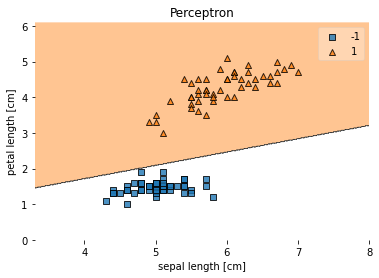

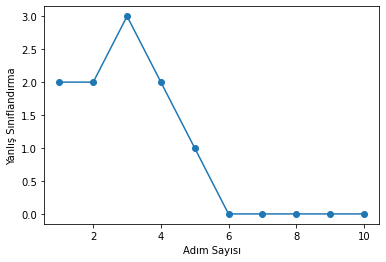

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Ağırlıklar: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Adım Sayısı')
plt.ylabel('Yanlış Sınıflandırma')
plt.show()


Gördüğümüz gibi, algılayıcı 6. iterasyondan sonra yakınsar ve iki çiçek sınıfını mükemmel bir şekilde ayırır.

<br>
<br>

## Algılayıcı Öğrenmedeki Problemler

Perceptron, iki İris çiçek sınıfını mükemmel bir şekilde sınıflandırsa da yakınsama, algılayıcının en büyük problemlerinden biridir. Frank Rosenblatt, iki sınıf lineer hiperdüzlem ile ayrılabiliyorsa, algılayıcı öğrenme kuralının yakınsadığını matematiksel olarak kanıtladı, ancak sınıflar bir lineer sınıflandırıcı tarafından mükemmel bir şekilde ayrılamazsa problemler ortaya çıkıyor. Bu sorunu göstermek için Iris veri setinden iki farklı sınıf ve özellik kullanacağız.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


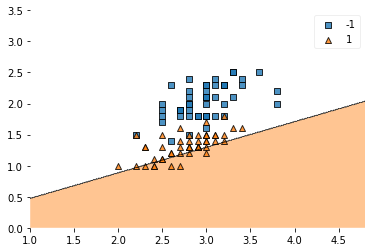

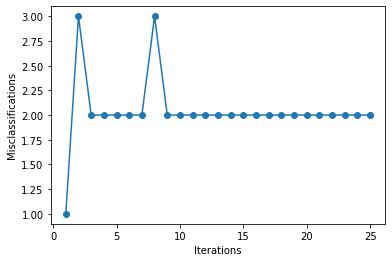

In [15]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [9]:
print('Yanlış sınıflandırma sayısı: %d / 100' % (y2 != ppn.predict(X2)).sum())

Yanlış sınıflandırma sayısı: 43 / 100


Daha düşük bir eğitim hızında bile, bir veya daha fazla örnek her çağda her zaman yanlış sınıflandırılacağından, öğrenme kuralının ağırlıkları güncellemeyi asla bırakmaması için algılayıcı iyi bir karar sınırı bulamadı.

Algılayıcı algoritmasının bir başka eksikliği de, tüm örnekler doğru sınıflandırılır sınıflandırılmaz ağırlıkları güncellemeyi bırakması bu bağlamda paradoksal görünebilir. Sezgimiz bize, sınıflar arasında büyük bir marjı olan bir karar sınırının (aşağıdaki şekilde kesikli çizgi ile gösterildiği gibi) algılayıcının karar sınırından daha iyi bir genelleme hatasına sahip olduğunu söyler. Ancak, Destek Vektör Makineleri gibi geniş marjlı sınıflandırıcılar başka bir zamanın konusudur.

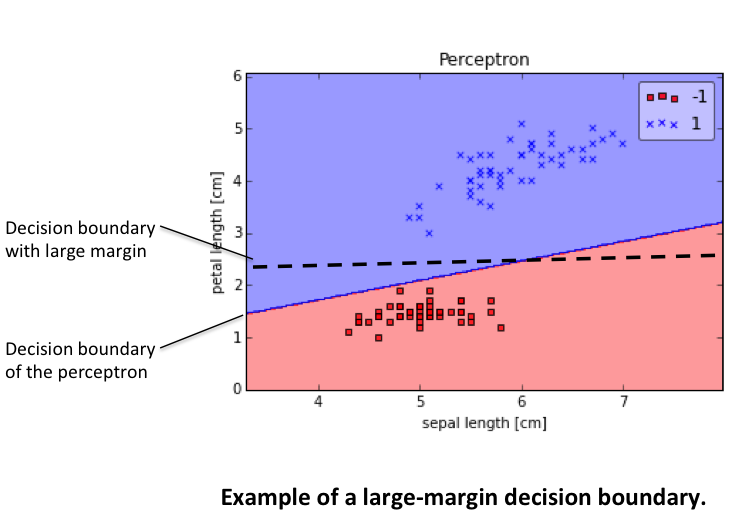<img src='./images/perceptron_margin.png' alt=''>

<br>
<br>

# Delta Öğrenme Kuralı ile Adaptif Doğrusal Nöronlar

Algılayıcı, keşfedildiği sırada kesinlikle çok popülerdi, ancak Bernard Widrow ve doktora öğrencisi Tedd Hoff'un Adaptif Lineer Nöron (adaline) fikrini önermesi sadece birkaç yıl aldı [[3](#References)] .

Algılayıcı kuralının aksine, adaline'nin delta kuralı (Widrow-Hoff" kuralı veya Adaline kuralı olarak da bilinir) ağırlıkları bir birim adım işlevi yerine doğrusal bir etkinleştirme işlevine göre günceller; burada, bu doğrusal etkinleştirme işlevi $g (\mathbf{z})$ sadece net girdi $g(\mathbf{w}^T\mathbf{x}) = \mathbf{w}^T\mathbf{x}$'ın kimlik fonksiyonudur. sonraki bölümde, bu lineer aktivasyonun neden perceptron güncellemesine göre bir gelişme olduğunu ve "delta kuralı" adının nereden geldiğini göreceğiz.

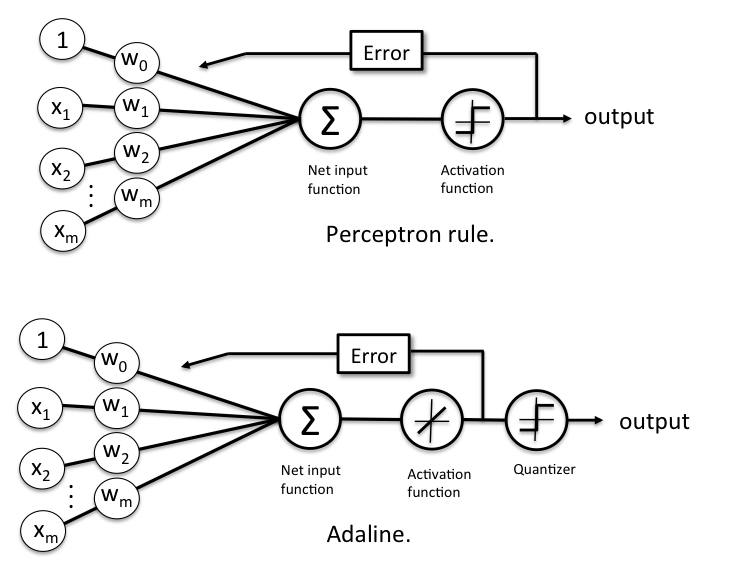<img src='./images/perceptron_vs_adaline.png' alt=''>

<br>
<br>

## Dereceli Azaltma

Sürekli bir fonksiyon olması nedeniyle lineer aktivasyon fonksiyonunun birim adım fonksiyonuna göre en büyük avantajlarından biri türevlenebilir olmasıdır. Bu özellik, ağırlıklarımızı güncellemek için minimize edebileceğimiz bir maliyet fonksiyonu $J(\mathbf{w})$ tanımlamamızı sağlar. Doğrusal aktivasyon fonksiyonu durumunda, $J(\mathbf{w})$ maliyet fonksiyonunu *karesel hataların toplamı* (SSE) olarak tanımlayabiliriz. kareler (OLS) doğrusal regresyon.

$$J(\mathbf{w}) = \frac{1}{2} \sum_{i} (\text{hedef}^{(i)} - \text{çıktı}^{(i)})^ 2 \quad \quad \text{çıktı}^{(i)} \in \mathbb{R}$$

($\frac{1}{2}$ kesri, sonraki paragraflarda göreceğimiz gibi, gradyanı türetmek için sadece kolaylık sağlamak için kullanılır.)

SSE maliyet fonksiyonunu en aza indirmek için, doğrusal sistemlerin yerel minimumunu bulmak için makine öğreniminde sıklıkla kullanılan basit ama kullanışlı bir optimizasyon algoritması olan gradyan inişini kullanacağız.

Eğlenceli kısma (hesap) geçmeden önce, tek bir ağırlık için dışbükey maliyet fonksiyonunu ele alalım. Aşağıdaki şekilde gösterildiği gibi, eğim inişinin ardındaki ilkeyi, yerel veya küresel bir minimuma ulaşılana kadar "bir tepeden aşağı inmek" olarak tanımlayabiliriz. Her adımda, eğimin ters yönüne doğru bir adım atıyoruz ve adım boyutu, eğimin eğiminin yanı sıra öğrenme hızının değeri tarafından belirleniyor.

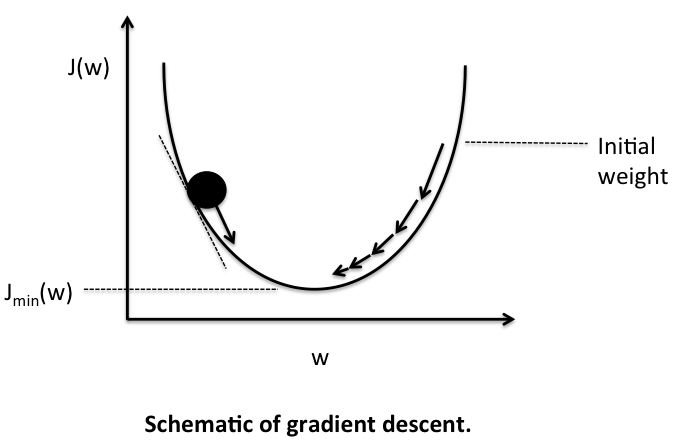<img src='./images/perceptron_gradient_descent_1.png' alt=''>

Şimdi, söz verildiği gibi, eğlenceli kısma - Adaline öğrenme kuralının türetilmesine.
Yukarıda bahsedildiği gibi, her güncelleme $\Delta \mathbf{w} = - \eta \nabla J(\mathbf{w})$ gradyanının ters yönüne doğru bir adım atılarak güncellenir, bu nedenle, ağırlık vektöründeki her ağırlık için maliyet fonksiyonunun kısmi türevi: $\Delta w_j = - \eta \frac{\partial J}{\partial w_j}$.




Belirli bir ağırlık için SSE maliyet fonksiyonunun kısmi türevi aşağıdaki gibi hesaplanabilir:

$$\begin{equation}
 \frac{\partial J}{\partial w_j} = \frac{\partial }{\partial w_j} \frac{1}{2} \sum_i  (t^{(i)} - o^{(i)})^2 \\
= \frac{1}{2} \sum_i \frac{\partial}{\partial w_j} (t^{(i)} - o^{(i)})^2 \\
= \frac{1}{2} \sum_i 2 (t^{(i)} - o^{(i)}) \frac{\partial}{\partial w_j} (t^{(i)} - o^{(i)}) \\
=  \sum_i (t^{(i)} - o^{(i)}) \frac{\partial}{\partial w_j} \bigg(t^{(i)} - \sum_j w_j x^{(i)}_{j}\bigg) \\
= \sum_i  (t^{(i)} - o^{(i)})(-x^{(i)}_{j}) 
\end{equation}$$

(t = target, o = output)

Ve sonuçları öğrenme kuralına geri eklersek, şunu elde ederiz:

$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = - \eta \sum_i  (t^{(i)} - o^{(i)})(- x^{(i)}_{j}) = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j}$,

Sonunda, perceptron kuralına benzer bir eşzamanlı ağırlık güncellemesi uygulayabiliriz:

$\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$.

**Yukarıdaki öğrenme kuralı, algılayıcı kuralıyla aynı görünse de, iki ana farklılığa dikkat edeceğiz:**

1. Burada, "o" çıktısı, algılayıcı öğrenme kuralındaki gibi bir sınıf etiketi değil, gerçek bir sayıdır.
2. Ağırlık güncellemesi, eğitim setindeki tüm numunelere dayalı olarak hesaplanır (her numuneden sonra ağırlıkları aşamalı olarak güncellemek yerine), bu nedenle bu yaklaşıma "toplu" gradyan inişi de denir.

<br>
<br>

## Eylemde Dereceli Azaltma Kuralı

In [11]:
import numpy as np

class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50): 
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Pratikte, optimal yakınsama için iyi bir öğrenme oranı bulmak için genellikle bazı deneyler yapılması gerekir, bu nedenle, iki farklı öğrenme oranı için maliyeti çizerek başlayacağız.

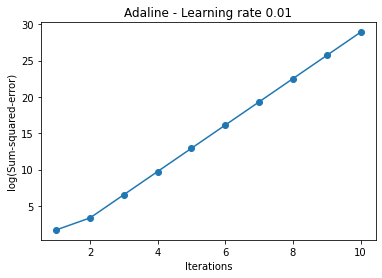

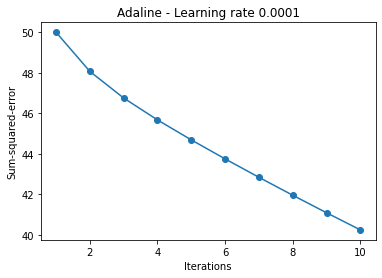

In [12]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

Yukarıdaki iki grafik, eğim inişiyle ilgili en yaygın iki sorunu göstererek öğrenme eğrilerini çizmenin önemini güzel bir şekilde vurgulamaktadır:

1. Öğrenme oranı çok büyükse, eğim inişi minimumları aşacak ve uzaklaşacaktır.
2. Öğrenme oranı çok küçükse, algoritma yakınsamak için çok fazla çağ gerektirecektir ve yerel minimumlarda daha kolay kapana kısılabilir.



<img src='./images/perceptron_learning_rate.png' alt=''>

Gradyan inişi, özellik ölçeklemenin birçok makine öğrenimi algoritması için neden önemli olduğuna iyi bir örnektir.
Öznitelikler aynı ölçekte ise uygun bir öğrenme oranı bulmak sadece daha kolay olmakla kalmaz, aynı zamanda daha hızlı yakınsama sağlar ve ağırlıkların çok küçük olmasını (sayısal kararlılık) önleyebilir.

Özellik ölçeklendirmenin yaygın bir yolu standardizasyondur.

$$\mathbf{x}_{j, std} = \frac{\mathbf{x}_j - \mathbf{\mu}_j}{\mathbf{\sigma}_j}$$

burada $\mathbf{\mu}_j$, sırasıyla $\mathbf{x}_{j}$ özelliğinin örnek ortalaması ve $\mathbf{\sigma}_j$ standart sapmadır. Standardizasyondan sonra, özellikler birim varyansa sahip olacak ve ortalama sıfır etrafında ortalanacaktır.

In [13]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


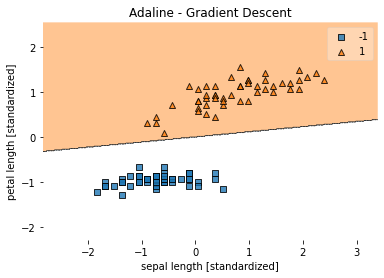

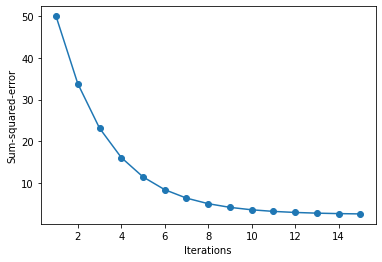

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

<img src='./images/perceptron_animation.gif' alt=''>

<br>
<br>

## Stokastik Dereceli Azaltma ile Online Öğrenme

Önceki bölümün tamamı "toplu" gradyan iniş öğrenimi ile ilgiliydi. "Yığın" güncellemeleri, tam eğitim veri setine dayalı olarak maliyet fonksiyonunun en aza indirilmesi gerçeğine atıfta bulunur. Algılayıcı kuralına geri dönersek, ağırlık güncellemesini her bir bireysel eğitim örneğinden sonra aşamalı olarak gerçekleştirdiğini hatırlarız. Bu yaklaşıma "çevrimiçi" öğrenme de denir ve aslında Adaline, Bernard Widrow ve diğerleri tarafından ilk kez bu şekilde tanımlanmıştır. [[3](#Referanslar)]

Ağırlıkların aşamalı olarak güncellenmesi işlemi, maliyet fonksiyonunun minimizasyonuna yaklaştığı için "stokastik" gradyan inişi olarak da adlandırılır. Stokastik gradyan inişi yaklaşımı, "rastlantısal" doğası ve "yaklaşık" yönü (gradyan) nedeniyle gradyan inişinden daha düşük gibi görünse de, pratikte belirli avantajları olabilir. Güncellemeler her eğitim örneğinden hemen sonra uygulandığından, genellikle stokastik gradyan inişi gradyan inişten çok daha hızlı yakınsar; stokastik gradyan inişi, özellikle çok büyük veri kümeleri için, hesaplama açısından daha verimlidir. Çevrimiçi öğrenmenin bir başka avantajı, örneğin web uygulamalarında yeni eğitim verileri geldiğinde sınıflandırıcının anında güncellenebilmesi ve depolama bir sorunsa eski eğitim verilerinin atılabilmesidir. Büyük ölçekli makine öğrenimi sistemlerinde, stokastik gradyan inişinden daha yumuşak yakınsama ile bir uzlaşma olan "mini-partiler" olarak adlandırılanları kullanmak da yaygın bir uygulamadır.

Tamlık açısından, stokastik gradyan inişi Adaline'i de uygulayalım ve bunun lineer olarak ayrılabilir iris veri setinde yakınsadığını doğrulayalım.

In [18]:
import numpy as np

class AdalineSGD(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
            
            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Adaline'ın stokastik gradyan inişi yoluyla öğrenmesine izin vermeden önce bir tavsiye daha, eğitim örneklerini rastgele sırayla yinelemek için eğitim veri setini karıştırmaktır.

"Standart" stokastik gradyan iniş algoritmasının "değiştirmeli" örnekleme kullandığını, yani her yinelemede tüm eğitim kümesinden bir eğitim örneğinin rastgele seçildiğini not edeceğiz. Buna karşılık, her eğitim örneğinin her çağda tam olarak bir kez değerlendirilmesi anlamına gelen "değiştirmeden" örnekleme, yalnızca uygulanması daha kolay olmakla kalmaz, aynı zamanda ampirik karşılaştırmalarda daha iyi bir performans gösterir. Bu konu hakkında daha ayrıntılı bir tartışma Benjamin Recht ve Christopher Re'nin makalesinde bulunabilir * Değişmeli olmayan aritmetik-geometrik ortalama eşitsizliği vadisinin altında: varsayımlar, vaka çalışmaları ve sonuçlar* [[4](#Referanslar)].


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


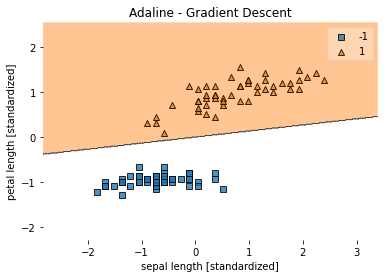

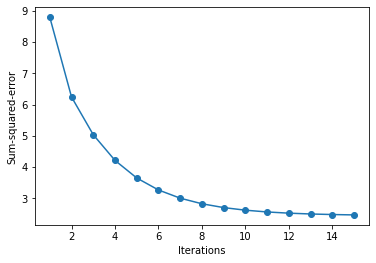

In [19]:
ada = AdalineSGD(epochs=15, eta=0.01)

# shuffle data
np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

# train and adaline and plot decision regions
ada.train(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

<br>
<br>

<img src='./images/perceptron_activation.png' alt=''>

<br>
<br>